# HR SALARY PREDICTION

##Problem Statement

The objective of this project is to clean the data, analyse it, and use a variety of ML classification approaches to forecast if a person's pay is greater than or less than $50k/year per year depending on their features.

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#to ignore the warning messages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
#reading the dataset to python environment

data= pd.read_csv (r"E:\TCS iON\salarydata.csv")

In [4]:
data.head()

,age,workclass,education,education-num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours_per_week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
data.tail()

,age,workclass,education,education-num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours_per_week,native-country,salary
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
#statistical summary

data.describe()

,age,education-num,capital-gain,capital-loss,hours_per_week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [7]:
#shape of the data

data.shape

(32561, 14)

In [8]:
#information of the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital_status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours_per_week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  salary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [9]:
#checking null values
data.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours_per_week    0
native-country    0
salary            0
dtype: int64

In [10]:
#checking number of unique values

data.nunique()

age                73
workclass           9
education          16
education-num      16
marital_status      7
occupation         15
relationship        6
race                5
sex                 2
capital-gain      119
capital-loss       92
hours_per_week     94
native-country     42
salary              2
dtype: int64

In [11]:
data.isin(['?']).sum(axis=0)

age                  0
workclass         1836
education            0
education-num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours_per_week       0
native-country     583
salary               0
dtype: int64

In [12]:
#Missing Values Handling  
data['native-country'] = data['native-country'].replace('?',np.nan)
data['workclass'] = data['workclass'].replace('?',np.nan)
data['occupation'] = data['occupation'].replace('?',np.nan)

In [13]:
data.isin(['?']).sum(axis=0)

age               0
workclass         0
education         0
education-num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours_per_week    0
native-country    0
salary            0
dtype: int64

In [14]:
data.isnull().sum()

age                  0
workclass         1836
education            0
education-num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours_per_week       0
native-country     583
salary               0
dtype: int64

In [15]:
for i in ['workclass','occupation','native-country']:
    data[i]=data[i].fillna(data[i].mode()[0])

In [16]:
data.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours_per_week    0
native-country    0
salary            0
dtype: int64

### Feature Reduction
*  While analyzing the dataset,  
* As we can see in the 'statistical summary': 'capital-gain' and 'capital-loss' both columns have 75% data as 0.00. So, we can drop 'capital-gain' and 'capital-loss'.


*   The column,'education-num' is the discrete numerical version of the column 'education', so we also drop it.

*   Also 'native-country' can be dropped as it doesn't play important role in salary prediction.

In [17]:
data=data.drop(['education-num','capital-gain', 'capital-loss','native-country'],axis=1)

In [18]:
data

,age,workclass,education,marital_status,occupation,relationship,race,sex,hours_per_week,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,<=50K
...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,<=50K
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,>50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,<=50K
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,<=50K


In [19]:
cat_cols =  data.select_dtypes(["object"])

#get the valuecounts
for i in cat_cols.columns:
    print(cat_cols[i].value_counts())
    print("-"*50)
    print("\n")

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
--------------------------------------------------


HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
--------------------------------------------------


Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64
----------------------

In [20]:
cat_cols.head()

,workclass,education,marital_status,occupation,relationship,race,sex,salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,<=50K


In [21]:
# checking all th unique values in each column

for i in cat_cols.columns:
    print (i)
    print(cat_cols[i].unique())
    print("-"*50)
    print("\n")

workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
--------------------------------------------------


education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
--------------------------------------------------


marital_status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
--------------------------------------------------


occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']
--------------------------------------------------


relationship
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
--------------

In [22]:
data.columns

Index(['age', 'workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'hours_per_week', 'salary'],
      dtype='object')

**Uni Variate Analysis**

In [23]:
def labeled_countplot(a):
  ax=sns.countplot(x=data[a])
  total = len(data)
  for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()/2
    ax.annotate(percentage, (x,y), ha='center', va='center')
  plt.xticks(rotation=50)
  plt.tight_layout()
  plt.show()
  return

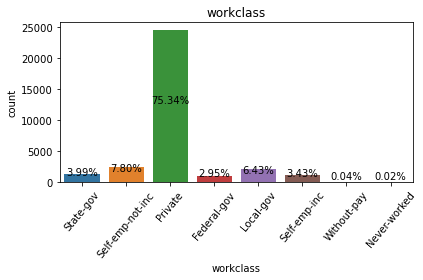

In [24]:
plt.title('workclass')
labeled_countplot('workclass')

here most of the employees are from private workclass(75.34%)

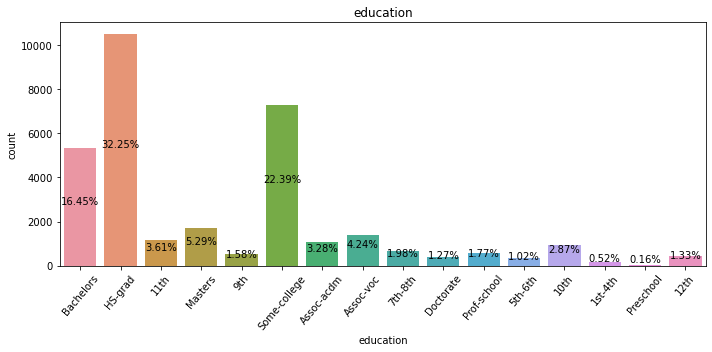

In [25]:
plt.figure(figsize=(10,5))
plt.title('education')
labeled_countplot('education')

Here most of the employees are from education of HS-grad (32.25%)

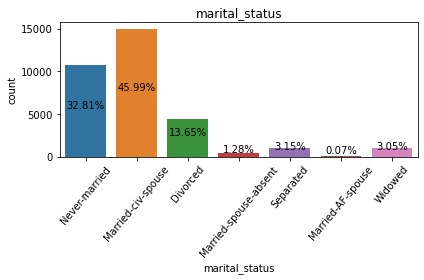

In [26]:
plt.title('marital_status')
labeled_countplot('marital_status')

Here most of the employees are from marital-status of Married-civ-spouse (45.99%)

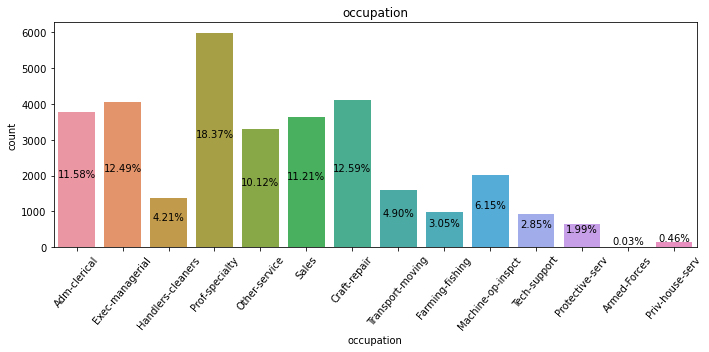

In [27]:
plt.figure(figsize=(10,5))
plt.title('occupation')
labeled_countplot('occupation')

Here most of the employees are from occupation of Prof-specialty (18.37%)



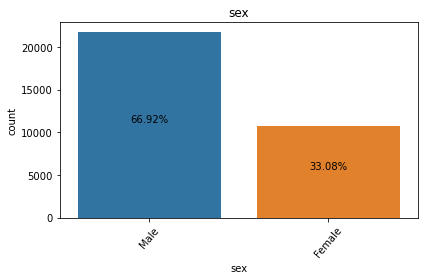

In [28]:
plt.title('sex')
labeled_countplot('sex')

Here most of the employees are Male (66.92%)

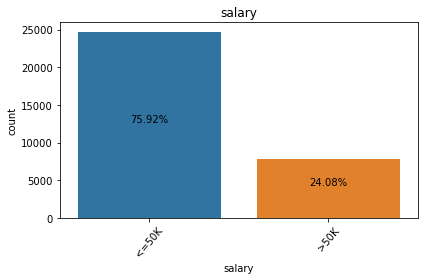

In [29]:
plt.title('salary')
labeled_countplot('salary')

Here most of the employees are getting salary less than or equal to 50k (75.92%)

**Bivariate Analysis**

In [30]:
def count_plot(x):
    sns.set() 
    plt.figure(figsize=(18,8))
    ax=sns.countplot(x,hue=data['salary'],data=data)
    total = len(data)
    for p in ax.patches:
      percentage = f'{100 * p.get_height() / total:.2f}%\n'
      x = p.get_x() + p.get_width() / 2
      y = p.get_height()/2
      ax.annotate(percentage, (x,y), ha='center', va='center')    
    plt.xticks(rotation=90)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.tight_layout()
    plt.show()

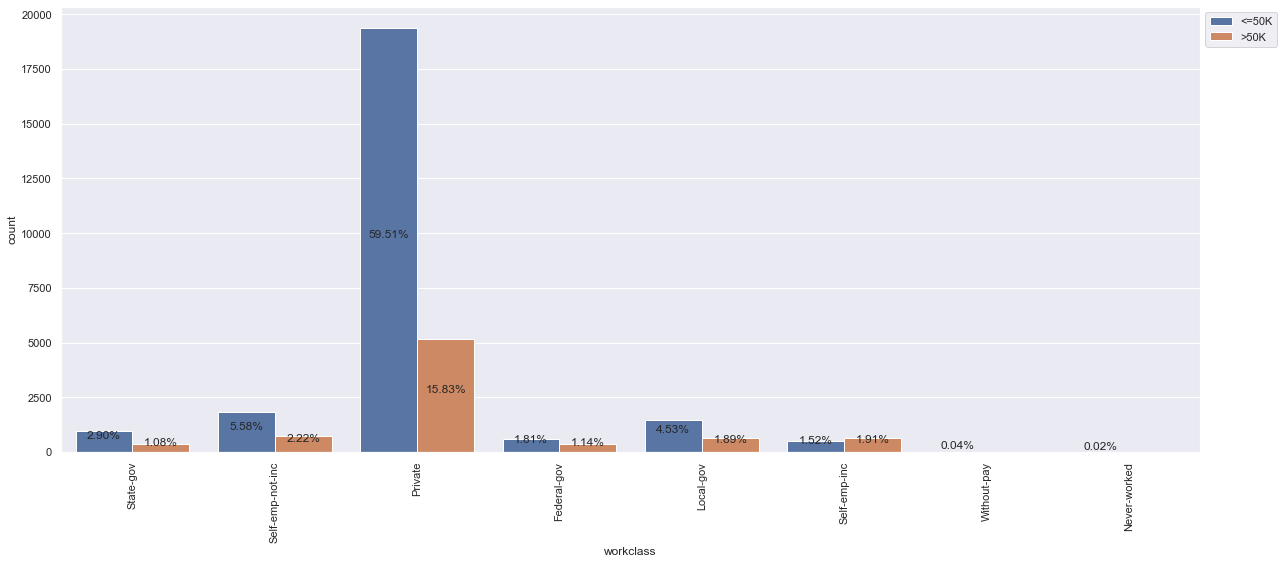

In [31]:
count_plot(data['workclass'])

Here most of the employees getting salary >50k are from private workclass(15.83%) and salary <=50k are also from private workclass (59.51%).

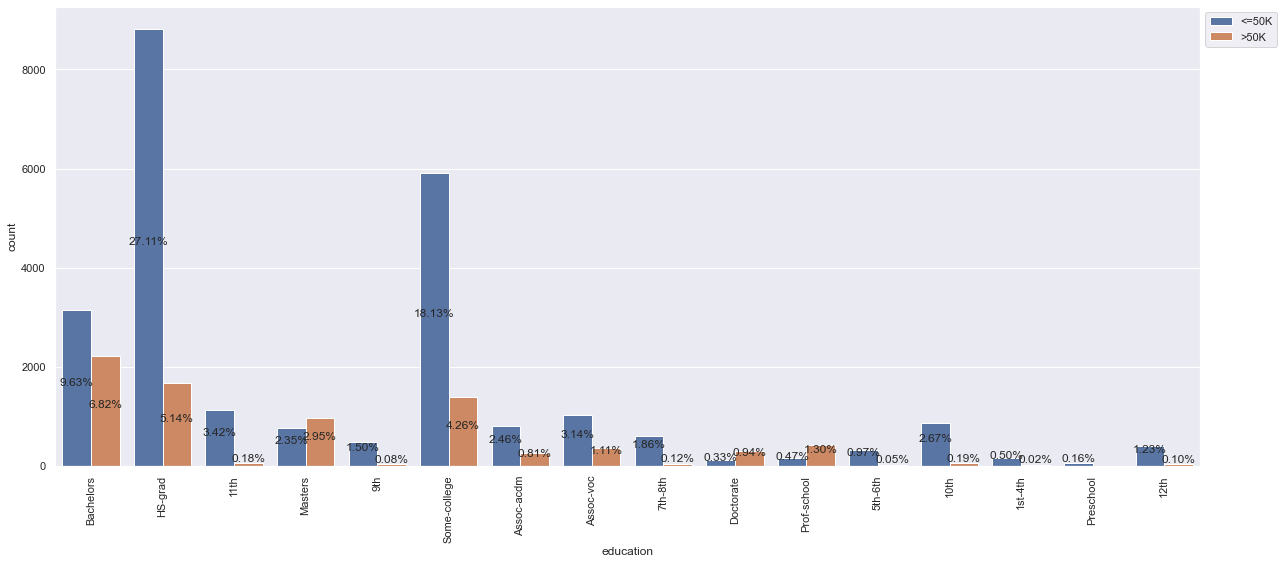

In [32]:
count_plot(data['education'])

Here most of the employees getting salary >50k are of Bachelors (6.82%) and salary <=50k are of HS-grad (27.11%).

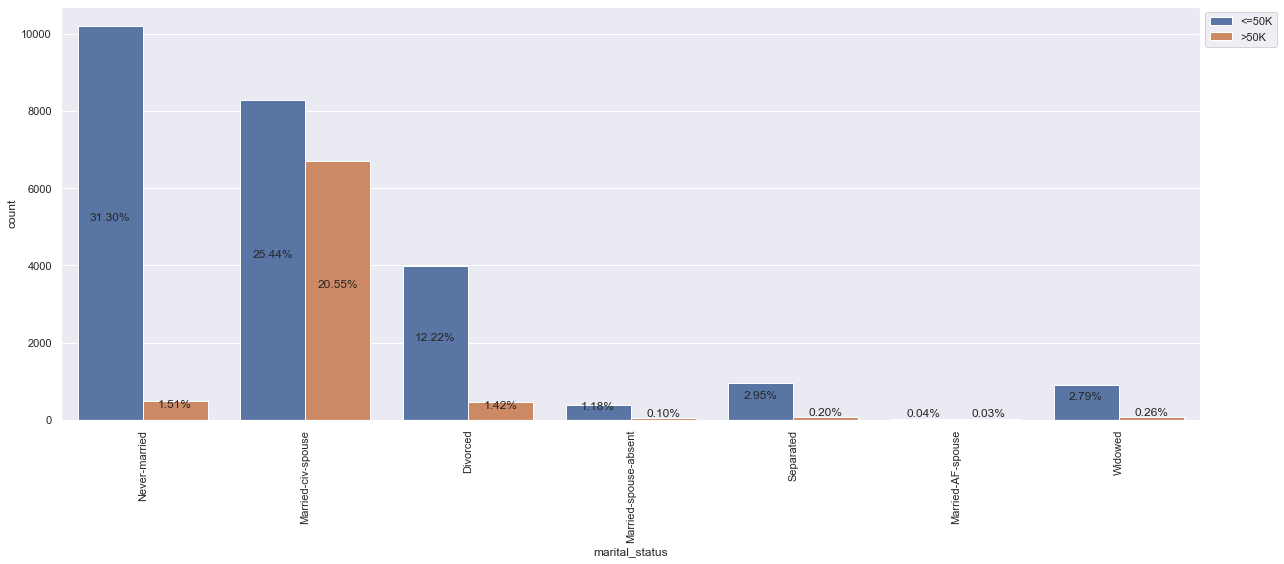

In [33]:
count_plot(data['marital_status'])

Here most of the employees getting salary >50k are from Married-civ-spouse (20.55%) and salary <=50k are from Never-married (31.30%).

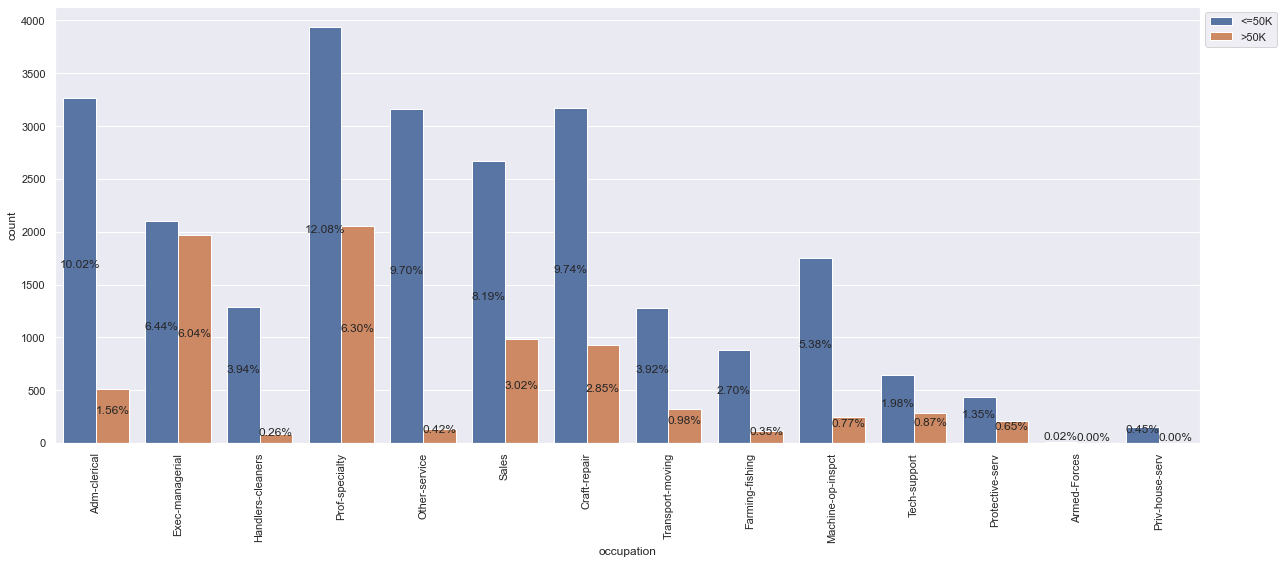

In [34]:
count_plot(data['occupation'])

Here most of the employees getting salary >50k are from Prof-specialty (6.30%) and salary <=50k are also from Prof-specialty (12.08%).

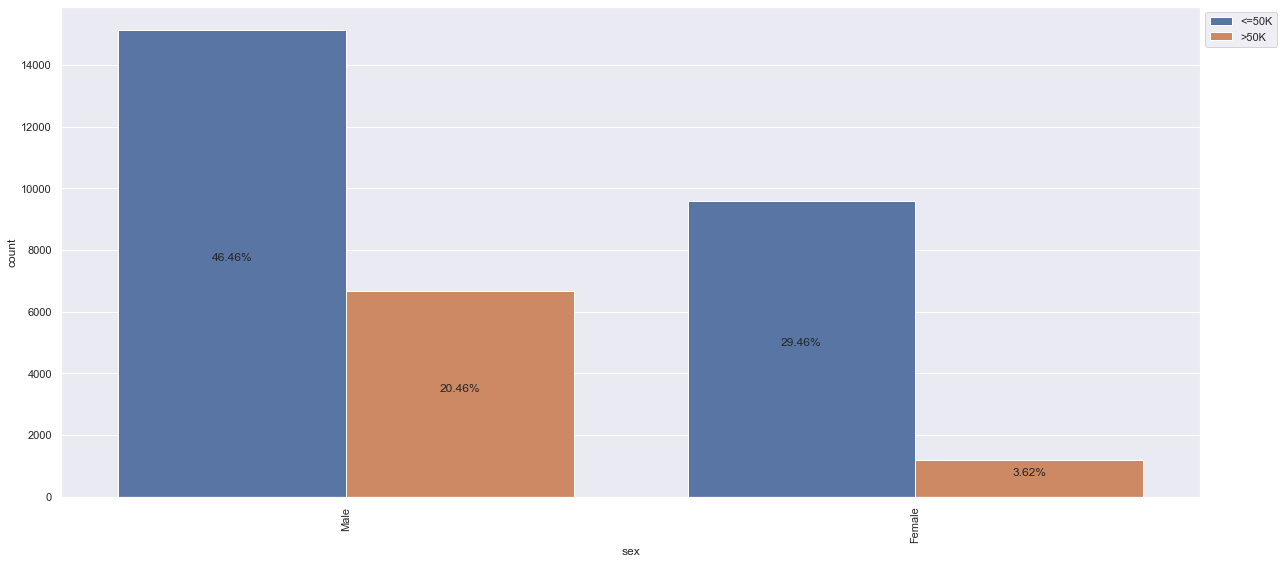

In [35]:
count_plot(data['sex'])

Here most of the employees getting salary >50k are Male (20.46%) and salary <=50k are also Male (46.46%).


In [36]:
data.isnull().sum()

age               0
workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
hours_per_week    0
salary            0
dtype: int64

In [37]:
# Salary
data.salary = data.salary.replace('<=50K', 0)
data.salary = data.salary.replace('>50K', 1)

<AxesSubplot:>

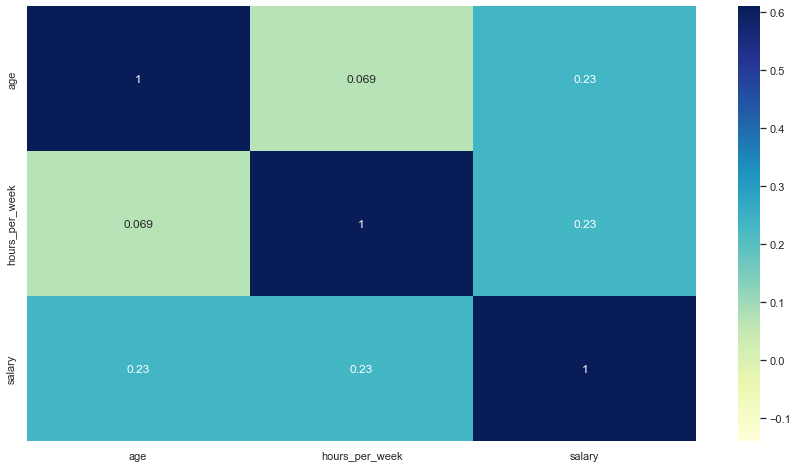

In [38]:
#correlation matrix
corr_matrix=data.corr()
plt.subplots(figsize=(15,8))
sns.heatmap(corr_matrix,annot=True,vmin=-0.14,vmax=0.61,cmap='YlGnBu')

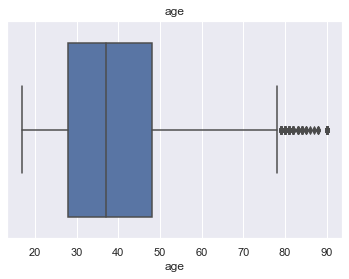

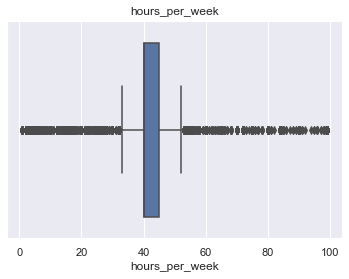

In [39]:
for i in ['age','hours_per_week'] :
    plt.title(i)
    sns.boxplot(data[i])
    plt.show() 

Here we could see outliers in both 'age' and 'hours-per-week', but hours-per-week is genuine outlier so we don’t have to treat the outliers and we treated outlier of age using the clipping procedure.

In [40]:
#Outlier Handling for the attribute age
Q1=data['age'].quantile(0.25) # 25th quantile
Q3=data['age'].quantile(0.75)  # 75th quantile
IQR=Q3-Q1
Lower_Whisker = Q1 - 1.5*IQR 
Upper_Whisker = Q3 + 1.5*IQR
data['age'] = np.clip(data['age'], Lower_Whisker, Upper_Whisker) 
    # all the values smaller than Lower_Whisker will be assigned value of Lower_whisker 
    # and all the values above upper_whishker will be assigned value of upper_Whisker 

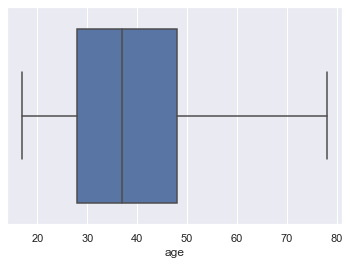

In [41]:
#checking whether the outliers are handled or not
sns.boxplot(data['age'])
plt.show()

In [42]:
from collections import Counter
counter = Counter(data['salary'])

In [43]:
counter


Counter({0: 24720, 1: 7841})

In [44]:
num_cols =  data.select_dtypes(["number"])
num_cols=num_cols.drop(['salary'], axis=1)
num_cols.head()

,age,hours_per_week
0,39.0,40
1,50.0,13
2,38.0,40
3,53.0,40
4,28.0,40


**Encoding**

In [45]:
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()
for i in cat_cols:
    cat_cols[i]=label_encoder.fit_transform(cat_cols[i])
    print(label_encoder.classes_)
cat_cols.head()

['Federal-gov' 'Local-gov' 'Never-worked' 'Private' 'Self-emp-inc'
 'Self-emp-not-inc' 'State-gov' 'Without-pay']
['10th' '11th' '12th' '1st-4th' '5th-6th' '7th-8th' '9th' 'Assoc-acdm'
 'Assoc-voc' 'Bachelors' 'Doctorate' 'HS-grad' 'Masters' 'Preschool'
 'Prof-school' 'Some-college']
['Divorced' 'Married-AF-spouse' 'Married-civ-spouse'
 'Married-spouse-absent' 'Never-married' 'Separated' 'Widowed']
['Adm-clerical' 'Armed-Forces' 'Craft-repair' 'Exec-managerial'
 'Farming-fishing' 'Handlers-cleaners' 'Machine-op-inspct' 'Other-service'
 'Priv-house-serv' 'Prof-specialty' 'Protective-serv' 'Sales'
 'Tech-support' 'Transport-moving']
['Husband' 'Not-in-family' 'Other-relative' 'Own-child' 'Unmarried' 'Wife']
['Amer-Indian-Eskimo' 'Asian-Pac-Islander' 'Black' 'Other' 'White']
['Female' 'Male']
['<=50K' '>50K']


,workclass,education,marital_status,occupation,relationship,race,sex,salary
0,6,9,4,0,1,4,1,0
1,5,9,2,3,0,4,1,0
2,3,11,0,5,1,4,1,0
3,3,1,2,5,0,2,1,0
4,3,9,2,9,5,2,0,0


In [46]:
data.columns

Index(['age', 'workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'hours_per_week', 'salary'],
      dtype='object')

**Normalization**

In [47]:
#importing the preprocessing library and did normalization in num_cols1
from sklearn import preprocessing
num_cols=preprocessing.normalize(num_cols)

In [48]:
#converting array to dataframe
num_cols=pd.DataFrame(num_cols,columns=['age','hours_per_week'])

In [49]:
num_cols.describe()

,age,hours_per_week
count,32561.000000,32561.000000
mean,0.669630,0.712911
std,0.140084,0.154050
min,0.188479,0.012819
25%,0.565528,0.640184
50%,0.668965,0.743294
75%,0.768221,0.824729
max,0.999918,0.982077


In [50]:
cat_cols.columns

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'salary'],
      dtype='object')

In [51]:
data=data.drop(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'salary','age','hours_per_week'], axis=1)

In [52]:
#concatenating encoded and normalized data to original data
data=pd.concat([cat_cols,data,num_cols],axis=1)
data.head()

,workclass,education,marital_status,occupation,relationship,race,sex,salary,age,hours_per_week
0,6,9,4,0,1,4,1,0,0.698100,0.716000
1,5,9,2,3,0,4,1,0,0.967823,0.251634
2,3,11,0,5,1,4,1,0,0.688749,0.724999
3,3,1,2,5,0,2,1,0,0.798189,0.602407
4,3,9,2,9,5,2,0,0,0.573462,0.819232


In [53]:
data=data[['age', 'workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'hours_per_week', 'salary']]
data

,age,workclass,education,marital_status,occupation,relationship,race,sex,hours_per_week,salary
0,0.698100,6,9,4,0,1,4,1,0.716000,0
1,0.967823,5,9,2,3,0,4,1,0.251634,0
2,0.688749,3,11,0,5,1,4,1,0.724999,0
3,0.798189,3,1,2,5,0,2,1,0.602407,0
4,0.573462,3,9,2,9,5,2,0,0.819232,0
...,...,...,...,...,...,...,...,...,...,...
32556,0.579207,3,7,2,12,5,4,0,0.815180,0
32557,0.707107,3,11,2,6,0,4,1,0.707107,1
32558,0.823213,3,11,6,0,4,4,0,0.567733,0
32559,0.739940,3,11,4,0,3,4,1,0.672673,0


**Removing Duplicates**

In [54]:
sum(data.duplicated(data.columns))

5199

In [55]:
data = data.drop_duplicates(data.columns, keep='last')
sum(data.duplicated(data.columns))

0

In [56]:
data

,age,workclass,education,marital_status,occupation,relationship,race,sex,hours_per_week,salary
0,0.698100,6,9,4,0,1,4,1,0.716000,0
1,0.967823,5,9,2,3,0,4,1,0.251634,0
2,0.688749,3,11,0,5,1,4,1,0.724999,0
3,0.798189,3,1,2,5,0,2,1,0.602407,0
4,0.573462,3,9,2,9,5,2,0,0.819232,0
...,...,...,...,...,...,...,...,...,...,...
32556,0.579207,3,7,2,12,5,4,0,0.815180,0
32557,0.707107,3,11,2,6,0,4,1,0.707107,1
32558,0.823213,3,11,6,0,4,4,0,0.567733,0
32559,0.739940,3,11,4,0,3,4,1,0.672673,0


**Splitting of Data**

In [57]:
x=data.drop(['salary'], axis=1)
y=data['salary']

In [58]:
#train test split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

**Logistic Regression**

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
log_reg=LogisticRegression()
log_reg_model=log_reg.fit(x_train,y_train)
log_pred=log_reg_model.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score
print('confusion matrix is:\n', confusion_matrix(y_test,log_pred))
print('accuracy score is:\n', accuracy_score(y_test,log_pred))

confusion matrix is:
 [[4104   64]
 [1262   43]]
accuracy score is:
 0.7577197149643705


C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**KNN**

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
metric_k=[]
neighbors=range(3,15)

for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier=classifier.fit(x_train,y_train)
    y_pred_KNN=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred_KNN)
    metric_k.append(acc)

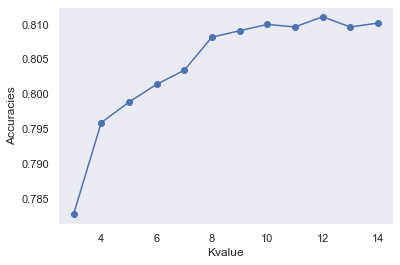

In [63]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('Kvalue')
plt.ylabel('Accuracies')
plt.grid()

In [64]:
classifier=KNeighborsClassifier(n_neighbors=12)
classifier=classifier.fit(x_train,y_train)
y_pred_KNN=classifier.predict(x_test)


In [65]:
print('confusion matrix is:\n', confusion_matrix(y_test,y_pred_KNN))
print('accuracy score is:\n', accuracy_score(y_test,y_pred_KNN))

confusion matrix is:
 [[3804  364]
 [ 670  635]]
accuracy score is:
 0.8110725379133931


**Random Forest**

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf_clf=RandomForestClassifier()
rf_clf=rf_clf.fit(x_train,y_train)
y_pred_rf=rf_clf.predict(x_test)

In [68]:
print('confusion matrix is:\n', confusion_matrix(y_test,y_pred_rf))
print('accuracy score is:\n', accuracy_score(y_test,y_pred_rf))

confusion matrix is:
 [[3672  496]
 [ 704  601]]
accuracy score is:
 0.7807418234971679


**Bagging Classifier**

In [69]:
from sklearn.ensemble import BaggingClassifier

In [70]:
bagging=BaggingClassifier(random_state=42)
bagging_model=bagging.fit(x_train,y_train)
bagging_pred=bagging_model.predict(x_test)

In [71]:
print('confusion matrix is:\n', confusion_matrix(y_test,bagging_pred))
print('accuracy score is:\n', accuracy_score(y_test,bagging_pred))

confusion matrix is:
 [[3655  513]
 [ 733  572]]
accuracy score is:
 0.772336926731226


**Decision Tree**

In [72]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf=dt_clf.fit(x_train,y_train)
y_pred_dt=dt_clf.predict(x_test)

In [73]:
print('confusion matrix is:\n', confusion_matrix(y_test,y_pred_dt))
print('accuracy score is:\n', accuracy_score(y_test,y_pred_dt))

confusion matrix is:
 [[3493  675]
 [ 735  570]]
accuracy score is:
 0.7423716426091723


In [74]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

**XG Boost**

In [75]:
xgb_classifier = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model=xgb_classifier.fit(x_train,y_train)
xgb_pred=xgb_model.predict(x_test)

In [76]:
print('confusion matrix is:\n', confusion_matrix(y_test,xgb_pred))
print('accuracy score is:\n', accuracy_score(y_test,xgb_pred))

confusion matrix is:
 [[3771  397]
 [ 581  724]]
accuracy score is:
 0.8213045861501919


**Gradient Boost**

In [77]:
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_model=gb_classifier.fit(x_train,y_train)
gb_pred=gb_model.predict(x_test)

In [78]:
print('confusion matrix is:\n', confusion_matrix(y_test,gb_pred))
print('accuracy score is:\n', accuracy_score(y_test,gb_pred))

confusion matrix is:
 [[3836  332]
 [ 641  664]]
accuracy score is:
 0.8222181618856204


In [79]:
from tabulate import tabulate

In [80]:
table = [['Model', 'Accuracy'], ['Logistic Regression',accuracy_score(y_test,log_pred)*100], ['KNN',accuracy_score(y_test,y_pred_KNN)*100],['Random Forest',accuracy_score(y_test,y_pred_rf)*100], ['Bagging Classifier',accuracy_score(y_test,bagging_pred)*100],['Deision Tree',accuracy_score(y_test,y_pred_dt)*100],['XG Boost',accuracy_score(y_test,xgb_pred)*100],['Gradient Boost',accuracy_score(y_test,gb_pred)*100]]
print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))

╒═════════════════════╤════════════╕
│ Model               │   Accuracy │
╞═════════════════════╪════════════╡
│ Logistic Regression │    75.772  │
├─────────────────────┼────────────┤
│ KNN                 │    81.1073 │
├─────────────────────┼────────────┤
│ Random Forest       │    78.0742 │
├─────────────────────┼────────────┤
│ Bagging Classifier  │    77.2337 │
├─────────────────────┼────────────┤
│ Deision Tree        │    74.2372 │
├─────────────────────┼────────────┤
│ XG Boost            │    82.1305 │
├─────────────────────┼────────────┤
│ Gradient Boost      │    82.2218 │
╘═════════════════════╧════════════╛


**HyperParameter tuning**

In [81]:
from sklearn.model_selection import RandomizedSearchCV


In [82]:
model=GradientBoostingClassifier()
parameters = {'learning_rate': [0.01,0.1,1,10,100],
            'n_estimators' : [5,50,250,500,1000,1250,1500,1750],
             'max_depth':[1,3,5,7,9]}

In [83]:
random=RandomizedSearchCV(estimator=model,param_distributions=parameters,n_iter=10,n_jobs=-1,cv=5)
random.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 1, 10,
                                                          100],
                                        'max_depth': [1, 3, 5, 7, 9],
                                        'n_estimators': [5, 50, 250, 500, 1000,
                                                         1250, 1500, 1750]})

In [84]:
print("the best estimator across all searched params:",random.best_estimator_)

print("The best score across all searched params:",random.best_score_)
print("The best parameters across all searched params:",random.best_params_)

the best estimator across all searched params: GradientBoostingClassifier(learning_rate=1, max_depth=1, n_estimators=1500)
The best score across all searched params: 0.8252092393343542
The best parameters across all searched params: {'n_estimators': 1500, 'max_depth': 1, 'learning_rate': 1}


In [85]:
gb_clf1=GradientBoostingClassifier(learning_rate=0.1,max_depth=7,n_estimators=50)
gb_clf1.fit(x_train,y_train)

y_pred_gb=gb_clf1.predict(x_test)
accuracy_score(y_test,y_pred_gb)

0.8267860405627626

In [86]:
table = [['Gradient Boost Accuracy', 'Values'], ['Before Tuning',accuracy_score(y_test,gb_pred)*100], ['After Tuning',accuracy_score(y_test,y_pred_gb)*100]]
print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))

╒═══════════════════════════╤══════════╕
│ Gradient Boost Accuracy   │   Values │
╞═══════════════════════════╪══════════╡
│ Before Tuning             │  82.2218 │
├───────────────────────────┼──────────┤
│ After Tuning              │  82.6786 │
╘═══════════════════════════╧══════════╛


In [87]:
py_flask=GradientBoostingClassifier()
py_flask.fit(x,y)

GradientBoostingClassifier()

In [88]:
#saving model
import pickle
pickle.dump(py_flask,open('Hr_salary.pkl',"wb"))